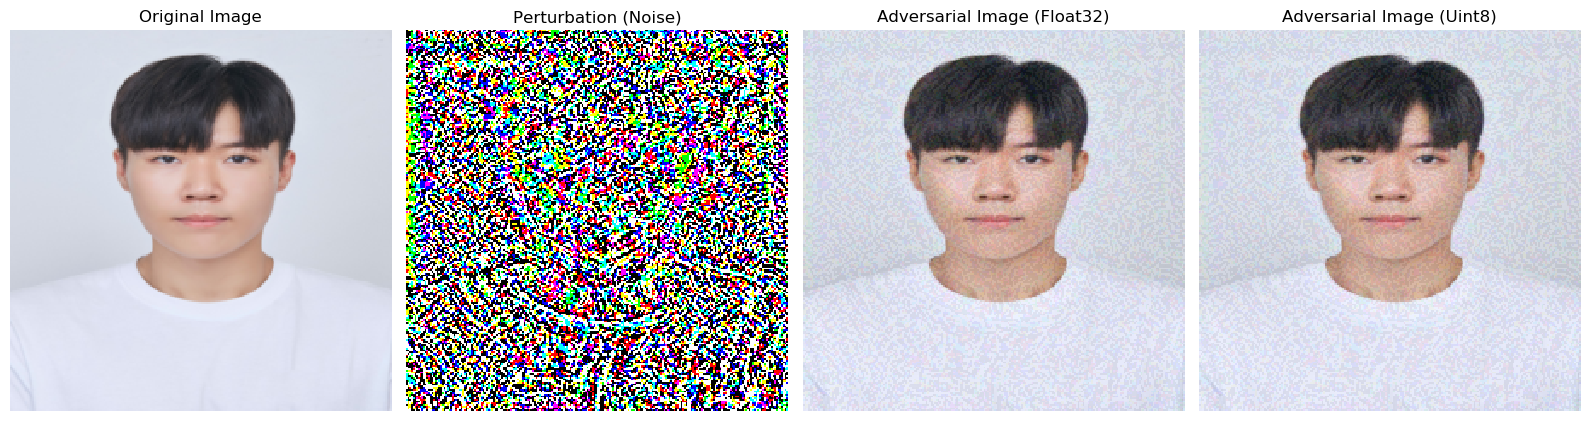

In [11]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def load_image(img_path, img_size=(224, 224)):
    transform = transforms.Compose([
        transforms.Resize(img_size),
        transforms.ToTensor(),
    ])
    image = Image.open(img_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0)
    return image, image_tensor

# 적대적 예제 생성 함수 (FGSM)
def generate_adversarial_example(model, image, label, epsilon):
    image.requires_grad = True

    output = model(image)
    loss = nn.CrossEntropyLoss()(output, label)
    
    model.zero_grad()
    loss.backward()
    
    # FGSM 
    perturbation = epsilon * image.grad.sign()
    adversarial_image = image + perturbation
    adversarial_image = torch.clamp(adversarial_image, 0, 1)  # 픽셀 값 제한
    return adversarial_image.detach(), perturbation.detach()

# Visualization
def visualize_results(original_image, perturbation, adv_image, adv_image_uint8):
    original_image_np = original_image.permute(1, 2, 0).detach().numpy()

    perturbation_np = perturbation.squeeze(0).permute(1, 2, 0).detach().numpy()

    adv_image_np = adv_image.squeeze(0).permute(1, 2, 0).detach().numpy()

    adv_image_uint8_np = adv_image_uint8.squeeze(0).permute(1, 2, 0).numpy()

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 4, 1)
    plt.title("Original Image")
    plt.imshow(original_image_np)
    plt.axis("off")

    plt.subplot(1, 4, 2)
    plt.title("Perturbation (Noise)")
    plt.imshow(perturbation_np / perturbation_np.max() * 0.5 + 0.5)  # Normalize for visualization
    plt.axis("off")

    plt.subplot(1, 4, 3)
    plt.title("Adversarial Image (Float32)")
    plt.imshow(adv_image_np)
    plt.axis("off")

    plt.subplot(1, 4, 4)
    plt.title("Adversarial Image (Uint8)")
    plt.imshow(adv_image_uint8_np / 255.0)  # Normalize for display
    plt.axis("off")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    img_path = "yeongmin.jpg"

    model = models.resnet18(pretrained=True)
    model.eval()
    label = torch.tensor([282])

    original_pil, original_image = load_image(img_path)

    epsilon = 0.03  # 섭동 크기
    adversarial_image, perturbation = generate_adversarial_example(model, original_image, label, epsilon)

    original_image_uint8 = (original_image * 255).byte()
    adversarial_image_uint8 = (adversarial_image * 255).byte()

    visualize_results(original_image.squeeze(0).detach(), perturbation, adversarial_image, adversarial_image_uint8)

In [13]:
original_image

tensor([[[[0.8353, 0.8392, 0.8353,  ..., 0.8314, 0.8275, 0.8275],
          [0.8353, 0.8392, 0.8392,  ..., 0.8275, 0.8235, 0.8275],
          [0.8353, 0.8353, 0.8392,  ..., 0.8235, 0.8235, 0.8235],
          ...,
          [0.8784, 0.8824, 0.8863,  ..., 0.7725, 0.7804, 0.8392],
          [0.8706, 0.8784, 0.8824,  ..., 0.7725, 0.8000, 0.8431],
          [0.8706, 0.8745, 0.8824,  ..., 0.7804, 0.8157, 0.8549]],

         [[0.8627, 0.8667, 0.8627,  ..., 0.8471, 0.8431, 0.8431],
          [0.8627, 0.8667, 0.8667,  ..., 0.8431, 0.8392, 0.8431],
          [0.8588, 0.8627, 0.8627,  ..., 0.8392, 0.8392, 0.8392],
          ...,
          [0.8902, 0.8941, 0.8980,  ..., 0.7843, 0.7882, 0.8627],
          [0.8824, 0.8902, 0.8941,  ..., 0.7843, 0.8078, 0.8667],
          [0.8824, 0.8863, 0.8941,  ..., 0.7922, 0.8275, 0.8706]],

         [[0.9020, 0.9059, 0.9020,  ..., 0.8824, 0.8784, 0.8784],
          [0.9020, 0.9059, 0.9059,  ..., 0.8784, 0.8745, 0.8784],
          [0.9020, 0.9020, 0.9059,  ..., 0

In [14]:
adversarial_image

tensor([[[[0.8053, 0.8692, 0.8653,  ..., 0.8614, 0.7975, 0.8575],
          [0.8053, 0.8092, 0.8092,  ..., 0.8575, 0.8535, 0.7975],
          [0.8053, 0.8053, 0.8092,  ..., 0.8535, 0.8535, 0.8535],
          ...,
          [0.9084, 0.9124, 0.9163,  ..., 0.8025, 0.8104, 0.8092],
          [0.9006, 0.9084, 0.9124,  ..., 0.8025, 0.7700, 0.8131],
          [0.9006, 0.9045, 0.9124,  ..., 0.8104, 0.7857, 0.8249]],

         [[0.8327, 0.8967, 0.8927,  ..., 0.8771, 0.8131, 0.8731],
          [0.8327, 0.8367, 0.8367,  ..., 0.8731, 0.8692, 0.8131],
          [0.8288, 0.8327, 0.8327,  ..., 0.8692, 0.8692, 0.8692],
          ...,
          [0.9202, 0.9241, 0.9280,  ..., 0.8143, 0.8182, 0.8927],
          [0.9124, 0.9202, 0.9241,  ..., 0.8143, 0.7778, 0.8967],
          [0.9124, 0.9163, 0.9241,  ..., 0.8222, 0.7975, 0.9006]],

         [[0.8720, 0.8759, 0.9320,  ..., 0.9124, 0.8484, 0.9084],
          [0.8720, 0.8759, 0.8759,  ..., 0.9084, 0.9045, 0.8484],
          [0.8720, 0.8720, 0.8759,  ..., 0

In [15]:
original_image_uint8

tensor([[[[213, 214, 213,  ..., 212, 211, 211],
          [213, 214, 214,  ..., 211, 210, 211],
          [213, 213, 214,  ..., 210, 210, 210],
          ...,
          [224, 225, 226,  ..., 197, 199, 214],
          [222, 224, 225,  ..., 197, 204, 215],
          [222, 223, 225,  ..., 199, 208, 218]],

         [[220, 221, 220,  ..., 216, 215, 215],
          [220, 221, 221,  ..., 215, 214, 215],
          [219, 220, 220,  ..., 214, 214, 214],
          ...,
          [227, 228, 229,  ..., 200, 201, 220],
          [225, 227, 228,  ..., 200, 206, 221],
          [225, 226, 228,  ..., 202, 211, 222]],

         [[230, 231, 230,  ..., 225, 224, 224],
          [230, 231, 231,  ..., 224, 223, 224],
          [230, 230, 231,  ..., 224, 223, 223],
          ...,
          [244, 245, 246,  ..., 218, 217, 236],
          [242, 244, 245,  ..., 218, 222, 237],
          [242, 243, 245,  ..., 221, 228, 239]]]], dtype=torch.uint8)

In [16]:
adversarial_image_uint8

tensor([[[[205, 221, 220,  ..., 219, 203, 218],
          [205, 206, 206,  ..., 218, 217, 203],
          [205, 205, 206,  ..., 217, 217, 217],
          ...,
          [231, 232, 233,  ..., 204, 206, 206],
          [229, 231, 232,  ..., 204, 196, 207],
          [229, 230, 232,  ..., 206, 200, 210]],

         [[212, 228, 227,  ..., 223, 207, 222],
          [212, 213, 213,  ..., 222, 221, 207],
          [211, 212, 212,  ..., 221, 221, 221],
          ...,
          [234, 235, 236,  ..., 207, 208, 227],
          [232, 234, 235,  ..., 207, 198, 228],
          [232, 233, 235,  ..., 209, 203, 229]],

         [[222, 223, 237,  ..., 232, 216, 231],
          [222, 223, 223,  ..., 231, 230, 216],
          [222, 222, 223,  ..., 231, 230, 215],
          ...,
          [251, 237, 238,  ..., 225, 224, 228],
          [249, 236, 252,  ..., 225, 214, 244],
          [249, 250, 252,  ..., 213, 220, 246]]]], dtype=torch.uint8)